In [7]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [8]:
%cd ~/programs/avid

/home/nicholas/programs/avid


In [46]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / '04-15-15_508'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_diled()

ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nicholas/programs/avid/logs/04-15-15_508/final_ckpt/ckpts

Restoring item from /home/nicholas/programs/avid/logs/04-15-15_508/final_ckpt/ckpts/10399.

Finished restoring checkpoint from /home/nicholas/programs/avid/logs/04-15-15_508/final_ckpt/ckpts/10399.

In [10]:
from avid.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── float32[6]
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[64]
│   │   │   └── kernel
│   │   │       └── float32[128, 64]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[2304]
│   │   │   └── kernel
│   │   │       └── float32[64, 2304]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[64]
│   │       └── scale
│   │           └── float32[64]
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── scale
│   │   │       └── float32[384]
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[384]
│   │   │   │   └── scale
│   │   │   │       └── float32[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[384]
│   │   │       └── kernel
│   │   │           └── float32[384, 384]
│   │   └── encoderblock_1
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── bfloat16[35, 6]
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── float32[384]
│   │       │   └── scale
│   │       │       └── float32[384]
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── float32[384]
│   │       │   └── scale
│   │       │       └── float32[384]
│   │       └── LazyInMLP_0 >>> Dense_0
│   │           ├── bias
│   │           │   └── float32[384]
│   │           └── kernel
│   │               └── float32[384, 384]
│   ├── label_embed >>> embeddings >>> embedding
│   │   └── float32[9, 64]
│   └── time_mlp >>> Dense_0
│       ├── bias
│       │   └── float32[64]
│       └── kernel
│           └── float32[64, 64]
└── encoder_decoder
    ├── dec_patch_proj
    │   ├── bias
    │   │   └── float32[1728]
    │   └── kernel
    │       └── float32[384, 1728]
    ├── encoder_conv >>> layers_0
    │   ├── layers_0 >>> kernel
    │   │   └── float32[10, 64, 32]
    │   └── layers_1
    │       ├── bias
    │       │   └── float32[32]
    │       └── scale
    │           └── float32[32]
    ├── patch_proj
    │   ├── bias
    │   │   └── float32[384]
    │   └── kernel
    │       └── float32[32, 384]
    └── spec_emb >>> embed_raw
        └── float32[56, 64]

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── -0.0110
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.1957
│   │   │   └── kernel
│   │   │       └── 0.0068
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── 0.0016
│   │   │   └── kernel
│   │   │       └── 0.0004
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.0668
│   │       └── scale
│   │           └── 0.4142
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── 0.0002
│   │   │   └── scale
│   │   │       └── 1.0023
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0001
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0008
│   │   │   │   └── scale
│   │   │   │       └── -0.0177
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0042
│   │   │   │   └── scale
│   │   │   │       └── 0.0357
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0032
│   │   │       └── kernel
│   │   │           └── 0.0004
│   │   └── encoderblock_1
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── -0.0020
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── -0.0012
│   │       │   └── scale
│   │       │       └── -0.0132
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── 0.0003
│   │       │   └── scale
│   │       │       └── 0.0175
│   │       └── LazyInMLP_0 >>> Dense_0
│   │           ├── bias
│   │           │   └── -0.0039
│   │           └── kernel
│   │               └── -0.0009
│   ├── label_embed >>> embeddings >>> embedding
│   │   └── -0.0141
│   └── time_mlp >>> Dense_0
│       ├── bias
│       │   └── -0.0314
│       └── kernel
│           └── -0.0188
└── encoder_decoder
    ├── dec_patch_proj
    │   ├── bias
    │   │   └── -0.0000
    │   └── kernel
    │       └── 0.0006
    ├── encoder_conv >>> layers_0
    │   ├── layers_0 >>> kernel
    │   │   └── 0.0001
    │   └── layers_1
    │       ├── bias
    │       │   └── 0.0103
    │       └── scale
    │           └── 0.1069
    ├── patch_proj
    │   ├── bias
    │   │   └── 0.0001
    │   └── kernel
    │       └── 0.0002
    └── spec_emb >>> embed_raw
        └── 0.0080

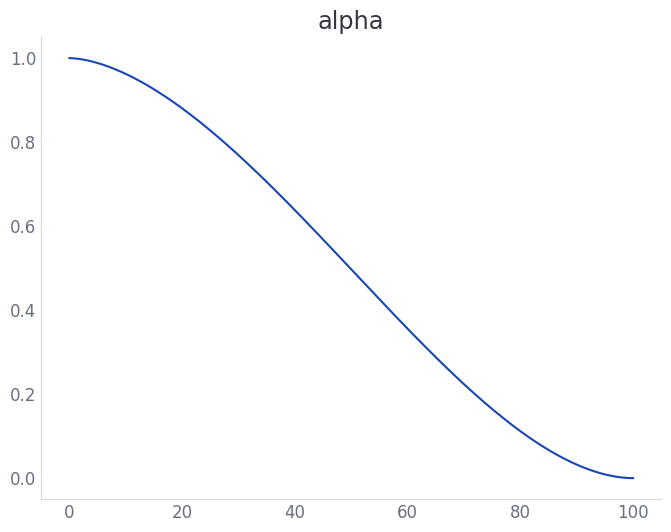

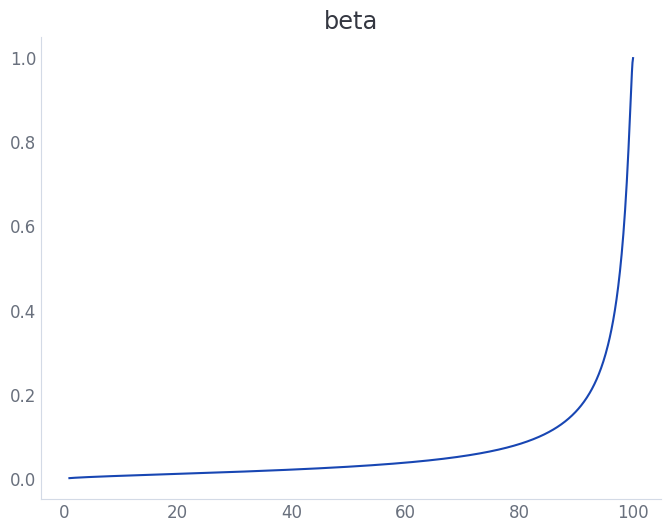

In [11]:
xx = jnp.linspace(0, 100, 1000)

for k, v in model.diffusion.schedule.alpha_beta(xx).items():
    plt.plot(xx, v, label=k)
    plt.title(k)
    plt.show()

In [12]:
model.encoder_decoder.spec_emb.species_embed_matrix()


Array([[ 2.20337689e-01, -1.44199766e-02,  2.41207574e-02, ...,
         1.27779573e-01, -1.22912169e-01, -1.72848597e-01],
       [-7.21740425e-02,  2.83197463e-01, -8.45873132e-02, ...,
         6.79787993e-03,  1.80766284e-01,  9.53686684e-02],
       [-1.29148379e-01,  5.54559790e-02,  5.04519194e-02, ...,
         6.71122745e-02,  1.85744822e-01, -1.80915624e-01],
       ...,
       [-1.32222980e-01, -6.42070025e-02,  3.48236486e-02, ...,
         1.00587860e-01,  3.87451984e-02, -5.68918139e-02],
       [-2.06665695e-03,  2.22546563e-01,  7.99778551e-02, ...,
         1.50650740e-05, -1.52915061e-01,  1.82393000e-01],
       [ 8.61624926e-02,  7.24777356e-02,  1.92621991e-01, ...,
        -1.36988670e-01,  1.01714395e-01,  8.69160146e-02]],      dtype=float32)

,Li,Be,B,N,O,F,Na,Mg,Al,Si,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,0.220338,-0.072174,-0.129148,-0.018593,-0.016800,0.112777,0.050142,-0.043171,0.286759,-0.130605,...,-0.314264,-0.223918,0.185788,-0.000225,-0.116228,-0.034007,-0.026747,-0.132223,-0.002067,0.086162
1,-0.014420,0.283197,0.055456,0.054941,0.116449,-0.119669,-0.001425,-0.018229,-0.059356,-0.096589,...,-0.254931,0.079877,0.123959,0.008730,0.182540,-0.065685,0.066115,-0.064207,0.222547,0.072478
2,0.024121,-0.084587,0.050452,0.144660,0.011188,0.071751,-0.116745,0.047102,0.084655,0.134442,...,-0.116354,0.184317,0.038940,0.086307,0.060933,0.089093,0.054794,0.034824,0.079978,0.192622
3,-0.054597,-0.144242,-0.190194,0.099883,0.025152,0.138803,-0.164719,0.075651,-0.154726,-0.193082,...,-0.060335,0.087559,0.031896,-0.105554,-0.091877,0.029181,0.146323,-0.006175,-0.062729,-0.054993
4,-0.069160,0.227649,-0.120086,-0.118594,-0.006578,-0.032760,0.009986,-0.006017,0.090458,-0.050879,...,-0.012301,-0.195673,0.157298,0.057375,-0.288456,-0.186733,0.137010,0.057353,-0.073173,-0.125284


<Axes: >

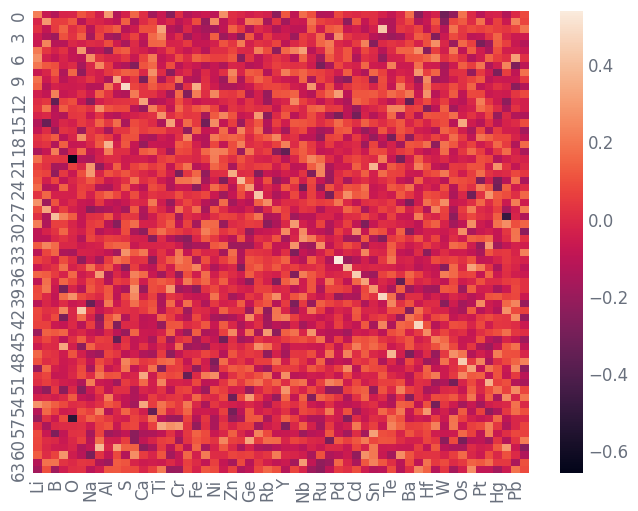

In [13]:
from avid.utils import ELEM_VALS
spec_emb = model.encoder_decoder.spec_emb.species_embed_matrix()

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS).T.reset_index(drop=True)
display(spec_df.head())

sns.heatmap(spec_df)

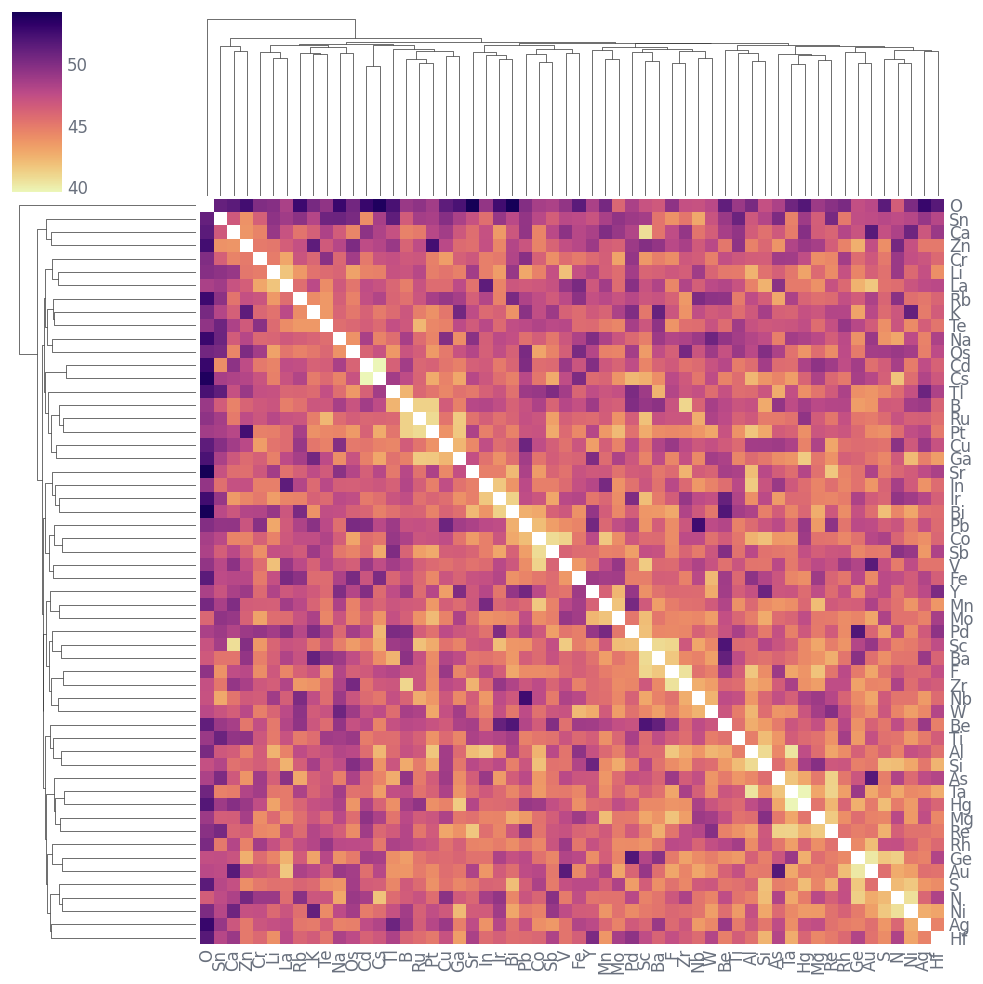

In [20]:
from scipy.spatial.distance import braycurtis, canberra
corr = spec_df.corr(method=canberra)
sns.clustermap(corr, xticklabels=1, yticklabels=1, cmap='rho_heatmap', mask=np.eye(len(corr.index)))

In [25]:
from avid.diled import conv_basis


econv = model.encoder_decoder.encoder_conv.layers[0].layers[0]
econv.basis[3]


Array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)

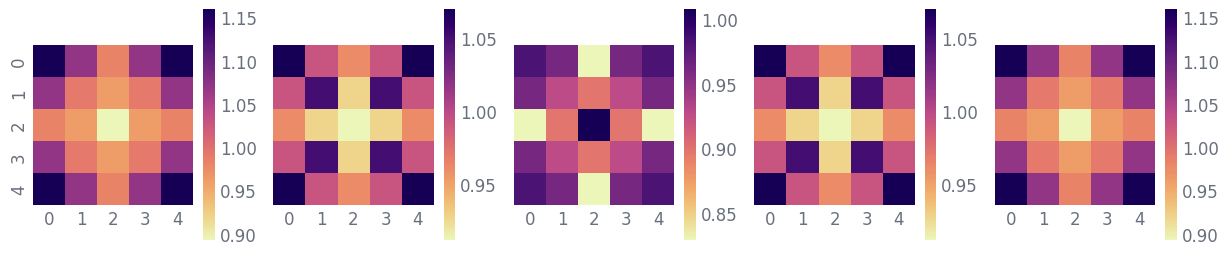

In [23]:
from eins import EinsOp


enc_kernel = EinsOp('subspace c_in c_out, subspace n1 n2 n3 -> n1 n2 n3 c_in c_out')(econv.kernel, econv.basis)
reduct = EinsOp('n n n c_in c_out -> n n n', reduce=('max'))(enc_kernel)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
for i, ax in enumerate(axs):
    sns.heatmap(reduct[i], cmap='rho_heatmap', robust=True, ax=ax, square=True)

<Axes: >

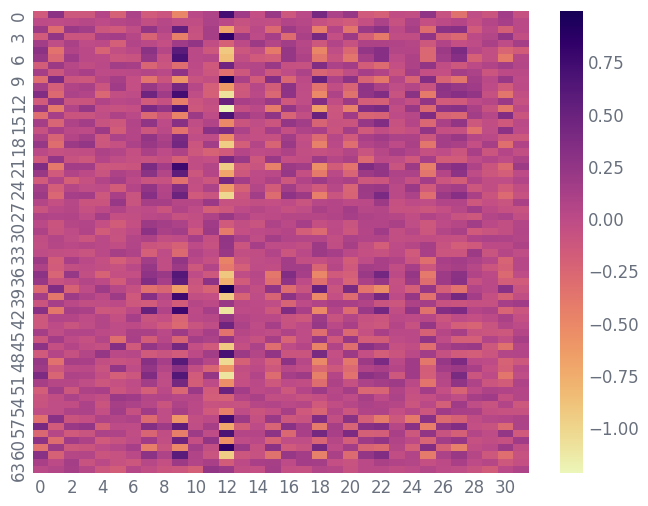

In [30]:
sns.heatmap(enc_kernel[1, 4, 1, :, :], cmap='rho_heatmap')

<Axes: >

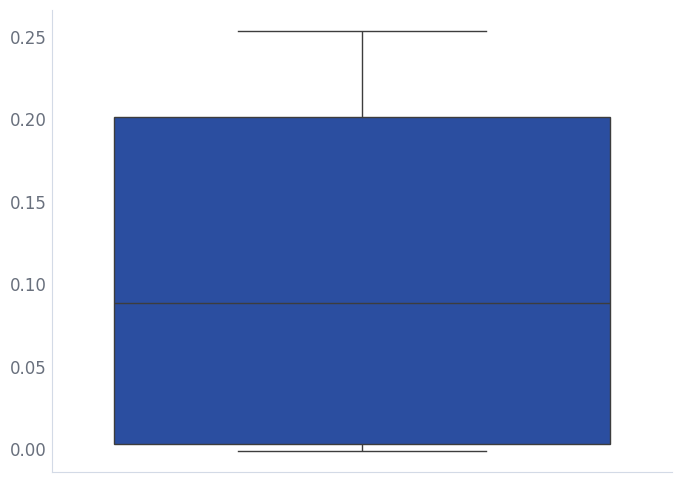

In [31]:
sns.boxplot(params['encoder_decoder']['encoder_conv']['layers_0']['layers_1']['scale'])

In [32]:
# debug_stat(params['mixer']['EquivariantMixerMLP_0']);
mha0 = params['diffusion']['backbone']['encoder']['encoderblock_0']['EquivariantMHA_0']
debug_structure(mha0);

arg0
├── key
│   ├── bias
│   │   └── float32[6, 64]
│   └── kernel
│       └── float32[384, 6, 64]
├── key_ln >>> scale
│   └── float32[64]
├── out
│   ├── bias
│   │   └── float32[384]
│   └── kernel
│       └── float32[6, 64, 384]
├── query
│   ├── bias
│   │   └── float32[6, 64]
│   └── kernel
│       └── float32[384, 6, 64]
├── query_ln >>> scale
│   └── float32[64]
├── relative_attn
│   └── bfloat16[35, 6]
└── value
    ├── bias
    │   └── float32[6, 64]
    └── kernel
        └── float32[384, 6, 64]

<Axes: >

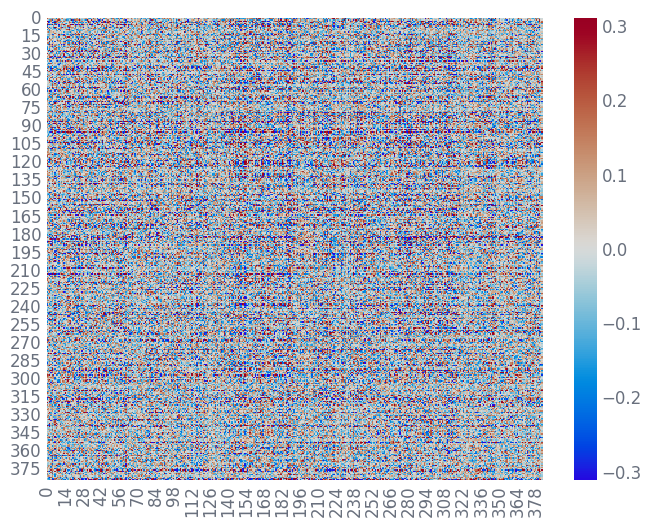

In [33]:
# sns.heatmap(params['head']['Dense_0']['kernel'], center=0, cmap='rho_diverging')
mat = mha0['query']['kernel'].astype(jnp.float32)
sns.heatmap(mat.reshape(mat.shape[0], mat.shape[0]), center=0, cmap='rho_diverging', robust=True)

<Axes: ylabel='Density'>

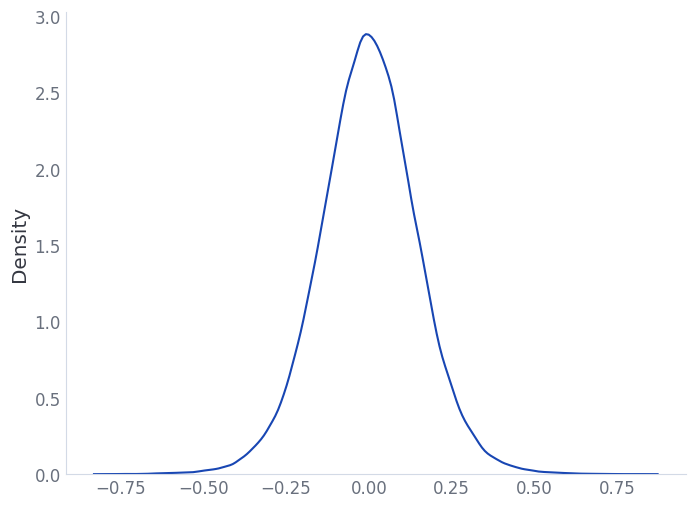

In [34]:
sns.kdeplot(mat.reshape(-1))

In [38]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_neighbors=15, metric='mahalanobis')
umap_df = spec_df.copy().T

umap_df[['x', 'y']] = umap.fit_transform(spec_df.T.values)

umap_df.columns = [str(c) for c in umap_df.columns]
px.scatter(umap_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

In [16]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 24

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_div_coolwarm

def plot(dens, n_skip=2, thresh=0.1, cmap='auto'):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    color_args = {
        'color_continuous_scale': cmap
    }
    if jnp.mean(dens < 0) > 0.1:
        color_args['color_continuous_midpoint'] = 0
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_div_icefire if is_dark else rp.list_div_coolwarm
    else:
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_inferna if is_dark else rp.list_inferna_r
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask],
        # color=np.array(species[mask]).astype('str'),
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
        **color_args
    )

In [40]:
from avid.dataset import load_file

batch = load_file(config, 0)
spec_emb, conv, patch = model.encoder_decoder.encode(batch, training=False)

In [42]:
patch.shape

(52, 8, 8, 8, 384)

In [65]:
from avid.diffusion import DiffusionInput
import flax.linen as nn
from tqdm import tqdm


rng = jax.random.key(123)
xt = jax.random.normal(rng, shape=patch[[0], ...].shape)
inp = DiffusionInput(x_t=xt, t=jnp.array([99]), y=model.category(batch)[:1])
state = inp
self = model.diffusion

steps = []
for i in tqdm(np.arange(inp.t.item() - 1)):
    steps.append(state)
    curr_rng, next_rng = jax.random.split(rng)
    out = self.mu_eps_sigma(inp, training=False)
    noise = jax.random.normal(curr_rng, shape=out['mu'].shape)
    x_tm1 = out['mu'] * out['sigma'] * noise
    next_state = DiffusionInput(x_t=x_tm1, t=inp.t - 1, y=inp.y)
    state, rng = next_state, next_rng
steps.append(state)

100%|██████████| 98/98 [00:07<00:00, 12.53it/s]


In [67]:
out_spec, out_conv = model.encoder_decoder.patch_decode(state.x_t, training=False)

In [68]:
mat = model.encoder_decoder.spec_emb.species_embed_matrix()
out = out_spec @ mat.T

out.shape

(1, 24, 24, 24, 56)

In [88]:
elems = np.abs(out.mean(axis=(0, 1, 2, 3)))
elem_is = np.argsort(-elems)
chosen_elems = [x for x in elem_is[elems[elem_is] > 0.06]]
[ELEM_VALS[x] for x in chosen_elems]

['N', 'Cs', 'O', 'Rb']

In [99]:
import functools as ft
from eins import EinsOp

dens = out[..., jnp.array(chosen_elems)]
dens = dens / jnp.max(jnp.abs(dens))

N_GRID = config.voxelizer.n_grid

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = EinsOp('d n1 n2 n3 -> (n1 n2 n3) d')(jnp.array([xx, yy, zz]))

xyz = (xyz + 0.2) % 1


def plot(dens, skip=2, thresh=0.2):
    cmap = rp.list_aquaria if is_dark else rp.list_cabana
    skip_mask = jnp.mgrid[0:N_GRID, 0:N_GRID, 0:N_GRID] % skip == 0
    skip_mask = skip_mask.reshape(3, -1).all(axis=0)
    dens = dens.max(axis=-1).reshape(-1)
    bg_mask = (abs(dens) > thresh).reshape(-1)
    mask = skip_mask & bg_mask
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask].astype(xyz.dtype),
        # color=np.array(species[mask]).astype('str'),
        color_continuous_scale=cmap,
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
    )
plot(dens)